In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

BATCH_SIZE = 4
EPOCHS = 1

cuda


In [106]:
# Tensor -1~1 change
# transform = transforms.Compose(
#     [transforms.Resize((1000,1000)),
#     transforms.ToTensor(),
#      transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
# )

transform = transforms.Compose(
    [transforms.Resize((224,224)),
    transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)


# Data Load
image_dataset = torchvision.datasets.ImageFolder(root="/home/iai/Desktop/Jeewon/Seminar/20230112_MVtecAD/data/simpleclassification_good_bad_aug/dataset", transform = transform)
print(f'Entire classes : {image_dataset.classes}')
print(f'Size of Entire classes : {len(image_dataset)}')

Entire classes : ['bad', 'good']
Size of Entire classes : 8192


In [107]:
train_size = int(0.8 * len(image_dataset))
test_size = len(image_dataset) - train_size

train_dataset, test_dataset = random_split(image_dataset, [train_size, test_size])


print(f'Size of entire dataset : {len(image_dataset)}')
print(f'Size of train dataset : {len(train_dataset)}')
print(f'Size of train dataset : {len(test_dataset)}')

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False, num_workers=2)


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

Size of entire dataset : 8192
Size of train dataset : 6553
Size of train dataset : 1639


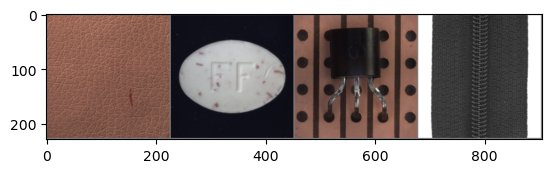

torch.Size([4, 3, 224, 224])


In [108]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(images.shape)

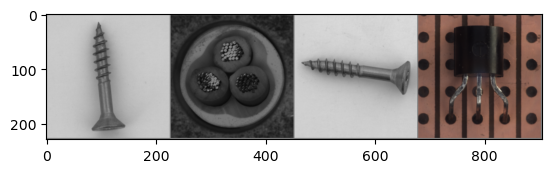

torch.Size([4, 3, 224, 224])


In [109]:

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(images.shape)

In [110]:
criterion = nn.CrossEntropyLoss()

loss_list = []

def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(device)
        label = label.to(device)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())

        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}({:.0f}%)]\tTrain Loss : {:.6f}".format(
                EPOCHS, batch_idx * len(image), 100. * batch_idx / len(train_loader), loss.item()
            ))

In [111]:
acc_list = []
accuracy = 0.0

def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    # correct = 0
    
    with torch.no_grad():
      n_correct = 0
      n_samples = 0
      n_class_correct = [0 for i in range(2)]
      n_class_samples = [0 for i in range(2)]
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          output = model(images)
          test_loss += criterion(output, labels).item()
          _, predicted = torch.max(output,1)
          n_samples += labels.size(0)
          n_correct += (predicted == labels).sum().item()
          
          for i in range(2):
            label = labels[i]
            pred = predicted[i]
            if(label == pred):
              n_class_correct[label]+=1
            n_class_samples[label]+=1
          acc_list.append(n_correct/n_samples * 100.)
            

          
    test_loss /= len(test_loader)
    test_accuracy = (n_correct / n_samples) * 100.
    return test_loss, test_accuracy

In [112]:
model = models.resnet18(pretrained=False).cuda()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.cuda()

In [113]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
# print(model)

In [114]:
for EPOCH in range(EPOCHS):
    train(model, train_loader, optimizer, log_interval = 5)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.4f} %\n".format(EPOCH, test_loss, test_accuracy))

Train Epoch: 1 [0(0%)]	Train Loss : 0.576985
Train Epoch: 1 [20(0%)]	Train Loss : 0.589547
Train Epoch: 1 [40(1%)]	Train Loss : 0.443762
Train Epoch: 1 [60(1%)]	Train Loss : 0.789213
Train Epoch: 1 [80(1%)]	Train Loss : 1.489188
Train Epoch: 1 [100(2%)]	Train Loss : 1.052088
Train Epoch: 1 [120(2%)]	Train Loss : 0.946856
Train Epoch: 1 [140(2%)]	Train Loss : 0.617725
Train Epoch: 1 [160(2%)]	Train Loss : 0.526632
Train Epoch: 1 [180(3%)]	Train Loss : 1.189529
Train Epoch: 1 [200(3%)]	Train Loss : 0.544964
Train Epoch: 1 [220(3%)]	Train Loss : 0.629924
Train Epoch: 1 [240(4%)]	Train Loss : 0.946880
Train Epoch: 1 [260(4%)]	Train Loss : 0.678779
Train Epoch: 1 [280(4%)]	Train Loss : 0.688601
Train Epoch: 1 [300(5%)]	Train Loss : 0.437481
Train Epoch: 1 [320(5%)]	Train Loss : 0.799561
Train Epoch: 1 [340(5%)]	Train Loss : 0.828284
Train Epoch: 1 [360(5%)]	Train Loss : 0.734646
Train Epoch: 1 [380(6%)]	Train Loss : 0.659654
Train Epoch: 1 [400(6%)]	Train Loss : 0.549653
Train Epoch: 1 [420

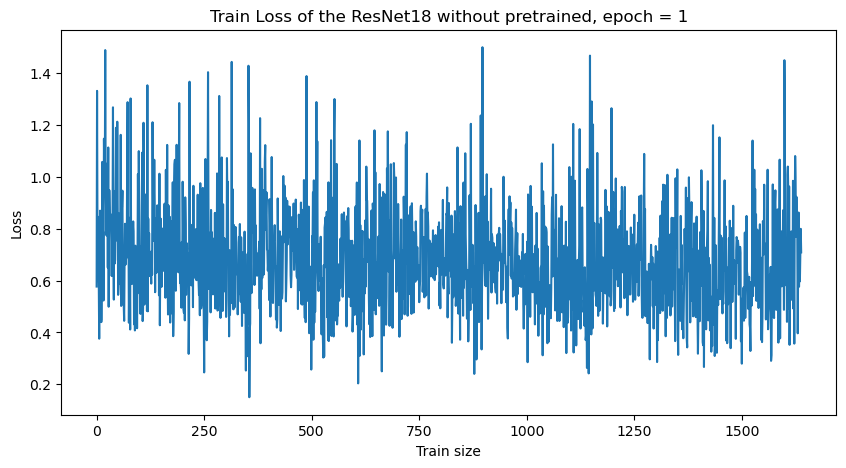

In [115]:
plt.figure(figsize=(10,5))
plt.plot(loss_list)
plt.xlabel('Train size')
plt.ylabel('Loss')
plt.title('Train Loss of the ResNet18 without pretrained, epoch = 1')
plt.legend
plt.show()

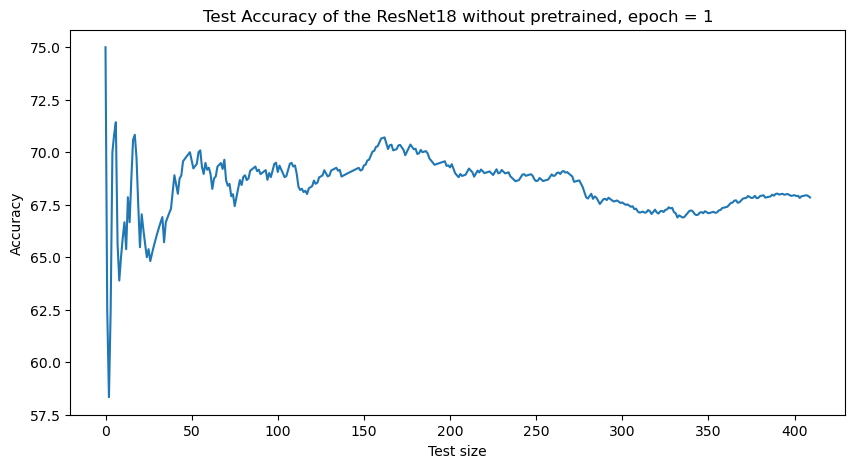

: 

In [116]:
plt.figure(figsize=(10,5))
plt.plot(acc_list)
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title('Test Accuracy of the ResNet18 without pretrained, epoch = 1')
plt.legend
plt.show()